# Import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lettura dataset

In [4]:
covid_df = pd.read_csv("datasets/owid-covid-data.csv")
covid_df.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
135205,PYF,Oceania,French Polynesia,2024-02-03,79291.0,0.0,1.000,650.0,0.0,0.000,...,NaN,NaN,NaN,77.66,NaN,306292,NaN,NaN,NaN,NaN
419677,VNM,Asia,Vietnam,2024-02-08,11624000.0,0.0,0.000,43206.0,0.0,0.000,...,45.9,85.847,2.600,75.40,0.704,98186856,NaN,NaN,NaN,NaN
305778,PCN,Oceania,Pitcairn,2023-11-18,4.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN
168980,HKG,Asia,Hong Kong,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.86,0.949,7488863,NaN,NaN,NaN,NaN
2958,OWID_AFR,NaN,Africa,2023-07-12,13104239.0,0.0,228.143,258993.0,0.0,0.571,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
249249,MCO,Europe,Monaco,2021-06-17,2350.0,0.0,2.429,33.0,0.0,0.000,...,NaN,NaN,13.800,86.75,NaN,36491,NaN,NaN,NaN,NaN
56851,BGR,Europe,Bulgaria,2024-05-18,1329289.0,0.0,3.286,38700.0,0.0,0.000,...,44.4,NaN,7.454,75.05,0.816,6781955,NaN,NaN,NaN,NaN
90024,CUW,North America,Curacao,2023-07-16,45883.0,0.0,0.000,305.0,0.0,0.000,...,NaN,NaN,NaN,78.88,NaN,191173,NaN,NaN,NaN,NaN
95962,DNK,Europe,Denmark,2021-06-10,288136.0,0.0,886.000,2518.0,0.0,0.286,...,18.8,NaN,2.500,80.90,0.940,5882259,NaN,NaN,NaN,NaN
132143,GUF,South America,French Guiana,2020-04-16,86.0,0.0,3.429,0.0,0.0,0.000,...,NaN,NaN,NaN,79.95,NaN,304568,NaN,NaN,NaN,NaN


# Svolgimento esericizio

## 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [7]:
print("Dimensioni dataset:", covid_df.shape)
print("\nMetadati del dataset:")
# vista la quantità di colonne, per rendere l'output più leggibile utilizzo un ciclo for
for column in covid_df.columns:
    print(column)


Dimensioni dataset: (429435, 67)

Metadati del dataset:
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vacci

In [8]:
# per capire con che tipologie di dati ho a che fare:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

## 2. Si chiede di trovare, per ogni continente:
   - il numero di casi fin dall'inizio della pandemia
   - la percentuale rispetto al totale mondiale del numero di casi

In [10]:
# controllo cosa c'è nella categoria continent per capire come strutturare eventuali raggruppamenti e
# come gestire eventuali valori nulli.
covid_df.continent.unique() 

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [11]:
# Ci sono dei valori nulli
covid_df.continent.isna().sum() 

26525

In [12]:
# controllo quali sono i valori che si trovano nella colonna "location" quando "continent" è nullo 
location_check = covid_df[covid_df.continent.isna()].location.unique() 
location_check

array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

In [13]:
# osservo il raggruppando per location e lo confronto con quanto uscito raggruppando per continente.
# Noto che ottengo gli stessi valori per le voci comuni ("Asia", "Africa" ecc).
#Inoltre la voce "world" presente in location corrisponde effettivamente al totale di casi calcolati raggruppando per continente.
# Le altre categorie come "European Union (27)", "High-income countries" ecc mi fanno capire che il dataset includa
# anche dati socioeconomici che non prenderò in considerazione nella successiva analisi poichè andrei ad includere due volte gli stessi dati.
covid_df.groupby("location").new_cases.sum().loc[location_check].astype(int)

location
Africa                            13146831
Asia                             301564180
Europe                           252916868
European Union (27)              185822587
High-income countries            429044052
Low-income countries               1944687
Lower-middle-income countries     92019711
North America                    124492698
Oceania                           15003468
South America                     68811012
Upper-middle-income countries    251756125
World                            775935057
Name: new_cases, dtype: int32

In [14]:
covid_df.groupby( "continent" ).new_cases.sum().sum().astype(int)

775935057

In [15]:
cases_per_continent = covid_df.groupby("continent").new_cases.sum()
cases_per_continent.index.name = ' '
print("Numero di casi per ogni continente da inizio pandemia:", cases_per_continent.astype(int))

Numero di casi per ogni continente da inizio pandemia:  
Africa            13146831
Asia             301564180
Europe           252916868
North America    124492698
Oceania           15003468
South America     68811012
Name: new_cases, dtype: int32


In [16]:
tot_cases_per_continent = covid_df.groupby( "continent" ).new_cases.sum().sum() 
percentuale_per_continent = ( cases_per_continent / tot_cases_per_continent * 100 ).round(2)
percentuale_per_continent.index.name = ' '
print("Percentuale per continente:", percentuale_per_continent.astype(str) + ' %')

Percentuale per continente:  
Africa            1.69 %
Asia             38.86 %
Europe            32.6 %
North America    16.04 %
Oceania           1.93 %
South America     8.87 %
Name: new_cases, dtype: object


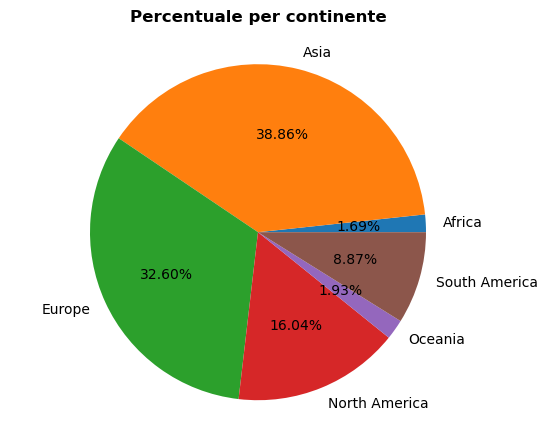

In [17]:
# visualizzazione delle percentuali per continente
etichette = "Africa", "Asia", "Europe","North America","Oceania","South America"
sizes = percentuale_per_continent
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = etichette, autopct='%1.2f%%')
ax1.axis('equal')  
plt.title('Percentuale per continente\n', fontsize=12, fontweight='bold')
plt.show()

## 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
   - l'evoluzione del casi totali dall'inizio alla fine dell'anno
   - il numero di nuovi casi rispetto alla data;  
      poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [19]:
# controllo la presenza di eventuali valori nulli da gestire
covid_df.date.isna().sum()

0

In [20]:
# non essendoci valori nulli procedo con la conversione della colonna "date" nel formato corretto
covid_df.date = pd.to_datetime(covid_df.date)

In [21]:
# creazione filtri
filter_2022 = covid_df.date.dt.year == 2022
filter_ita = covid_df.location == "Italy"

Text(0.5, 1.0, 'Andamento totale dei casi di COVID in Italia nel 2022\n')

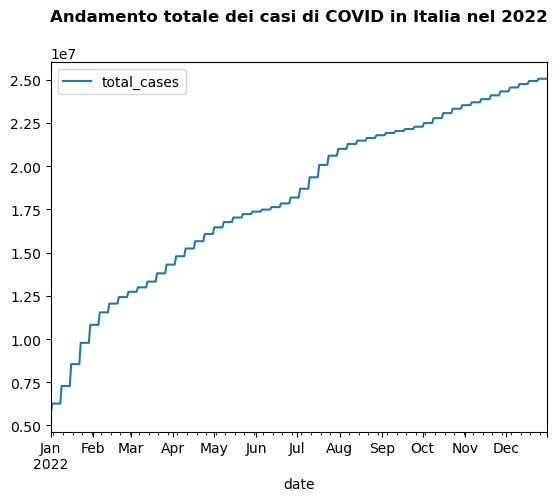

In [22]:
covid_df[filter_2022 & filter_ita].plot(x = "date", y = "total_cases")
plt.title("Andamento totale dei casi di COVID in Italia nel 2022\n", fontsize=12, fontweight='bold')

Text(0.5, 1.0, 'Nuovi casi rispetto alla data \n')

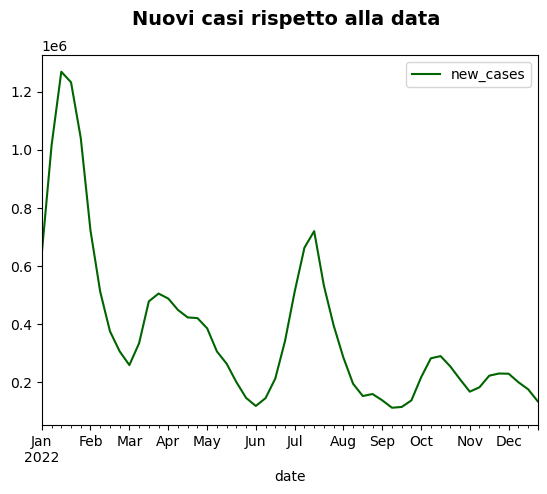

In [23]:
# new_cases diverso da zero, raramente in questa colonna ci sono casi negativi (fonte: redme presente su github)
covid_df[filter_2022 & filter_ita & covid_df.new_cases != 0].plot(x = "date", y = "new_cases", color = "darkgreen")                                                              
plt.title("Nuovi casi rispetto alla data \n", fontsize=14, fontweight='bold')

## 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
    - scrivere un breve commento a riguardo

In [25]:
filter_data = covid_df.date.between("2022-05-01", "2023-04-30", inclusive = "both")
filter_IGF = covid_df.location.str.contains("Italy|Germany|France")


Text(0, 0.5, '')

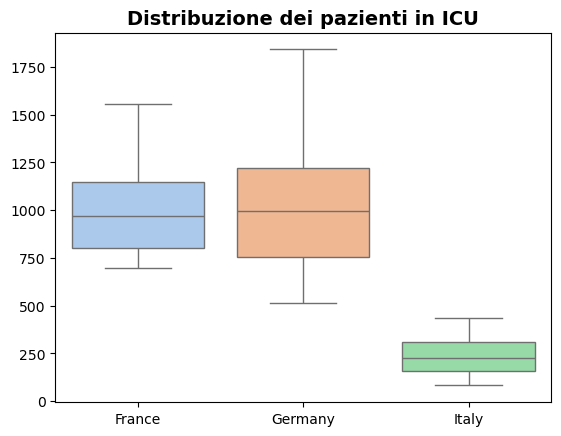

In [26]:
sns.boxplot(data = covid_df[filter_data & filter_IGF], x = "location", y = "icu_patients",
            palette = "pastel", hue = "location")
plt.title("Distribuzione dei pazienti in ICU", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("")

In [27]:
# l'Italia ha una distribuzione più centrata rispetto a quelle di Germania e Francia che presentano invece una distribuzione simile.
#Queste ultime hanno una mediana simile, ma la Germania ha una distribuzione più ampia e con maggiore variabilità. 
# L'Italia ha il numero più basso di pazienti in ICU e questo potrebbe dipendere da vari fattori come l'attuazione di misure più restrittive
# e efficati a contenere i casi covid o magari ad una disponibilità ridotta di posti in ICU.

## 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
   - mostrare la somma dei pazienti ospitalizzati per ognuna
   - se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [29]:
filter_IGFS = covid_df.location.str.contains("Italy|Germany|France|Spain")
filter_2023 = covid_df.date.dt.year == 2023

In [30]:
hosp_IGFS_daily = covid_df[filter_2023 & filter_IGFS].groupby("location")["hosp_patients"].sum()
hosp_IGFS_daily.astype(int)

location
France     1382574
Germany          0
Italy      1175272
Spain       354602
Name: hosp_patients, dtype: int32

Text(0, 0.5, ' ')

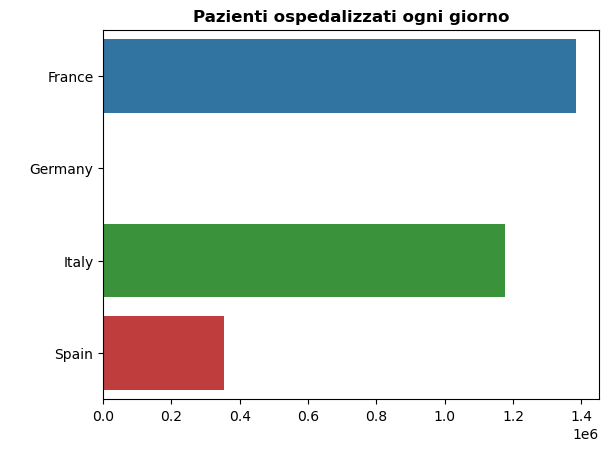

In [80]:
sns.barplot(data = covid_df[filter_2023 & filter_IGFS], x = "hosp_patients", y = "location",estimator = "sum", hue = "location", errorbar = None)
plt.title("Pazienti ospedalizzati ogni giorno", fontsize=12, fontweight='bold')
plt.xlabel("")
plt.ylabel(" ")

In [ ]:
# Nella descrizione del metadato "hosp_patients" presente nella documentazione su GitHub, si legge: 
# "Number of COVID-19 patients in hospital on a given day". Tuttavia, per la Germania, i valori risultano pari a zero.
# Interrogando il database per "weekly_hosp_admission", emergono invece dati relativi alla Germania. 
# Questo accade probabilmente perché il paese comunicava i ricoveri su base settimanale.
# Ripartire equamente i dati settimanali sui singoli giorni non sarebbe una scelta appropriata, poiché implicherebbe 
# un flusso costante di ricoveri, un'ipotesi poco realistica. Pertanto, ritengo più corretto lasciare i valori nulli per hosp_patients.

In [66]:
hosp_IGFS_weekly = covid_df[filter_2023 & filter_IGFS].groupby("location")["weekly_hosp_admissions"].sum()
hosp_IGFS_weekly.astype(int)

location
France     268117
Germany    897776
Italy      592019
Spain      299463
Name: weekly_hosp_admissions, dtype: int32

Text(0, 0.5, '')

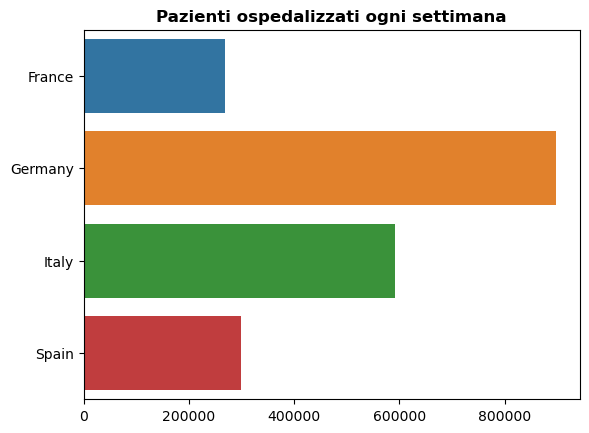

In [78]:
sns.barplot(data = covid_df[filter_2023 & filter_IGFS], x = "weekly_hosp_admissions", y = "location",estimator = "sum", hue = "location", errorbar = None) 
plt.title("Pazienti ospedalizzati ogni settimana", fontsize=12, fontweight='bold')
plt.xlabel("")
plt.ylabel("")